In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Loading the Dataset to python environment. 

In [183]:
data=pd.read_csv("/content/titanic_dataset.csv")

In [184]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Making ‘PassengerId’ as the index column


In [185]:
data=pd.read_csv("/content/titanic_dataset.csv", index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
# Passenger ID now set as the index


3.Checking the basic details of the dataset

In [187]:
data.shape

(891, 11)

In [188]:
data.describe

<bound method NDFrame.describe of              Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]>

In [189]:
data.info

<bound method DataFrame.info of              Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]>

In [190]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

4.Fill in all the missing values present in all the columns in the dataset

In [191]:
data.isna() .sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

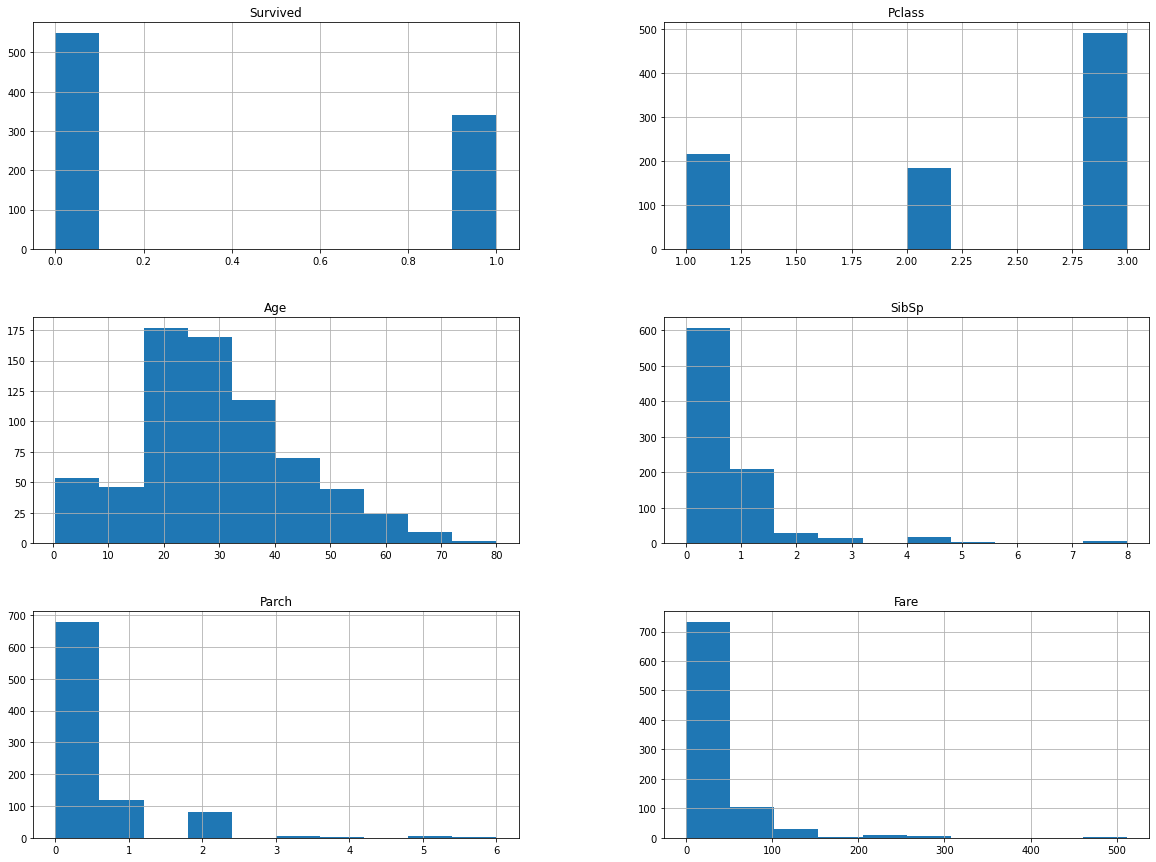

In [192]:

data.hist(figsize=(20,15))
plt.show()

In [193]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [194]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [195]:
# Here Age, Cabin and Embarked are the coloumns that have missing values. Age coloumn is now filled but the other two coloumns are objects.

 5. To Check and handle outliers in at least 3 columns in the dataset

In [196]:
# outliers in the Age column

Text(0.5, 1.0, 'Age')

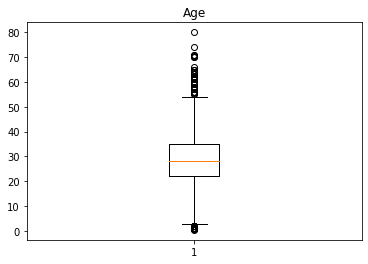

In [197]:
plt.boxplot(data['Age'])
plt.title('Age')

In [198]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
low = Q1-1.5*IQR
up = Q3+1.5*IQR


In [199]:
Outlier = []
for x in data['Age']:
  if((x>up) or (x<low)):
    Outlier.append(x)

In [200]:
Outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [201]:
ind =data['Age']>up
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [202]:
indi = data['Age']<low
data.loc[indi].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [203]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace = True)

In [204]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace = True)

Text(0.5, 1.0, 'Age(with reduced outliers)')

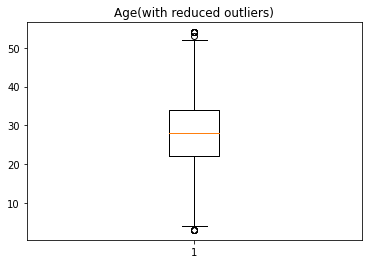

In [205]:
plt.boxplot(data['Age'])
plt.title('Age(with reduced outliers)')

In [206]:
# outliers in the Fare column

Text(0.5, 1.0, 'Fare')

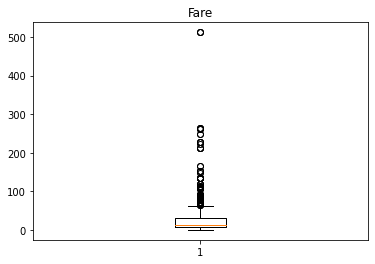

In [207]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [208]:
Q1 = np.percentile(data['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
low = Q1-1.5*IQR
up = Q3+1.5*IQR

In [209]:
Outlier2 = []
for x in data['Fare']:
  if((x>up) or (x<low)):
    Outlier2.append(x)

In [210]:
Outlier2

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [211]:
ind =data['Fare']>up
ni= data.loc[ind].index
ni

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [212]:
data.drop(ni, inplace= True)

Text(0.5, 1.0, 'Fare (with reduced outliers)')

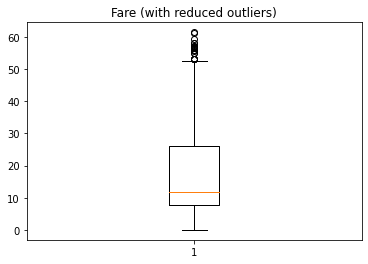

In [213]:
plt.boxplot(data['Fare'])
plt.title('Fare (with reduced outliers)')

In [214]:
# checking the outliers in the Parch column

Text(0.5, 1.0, 'SibSp')

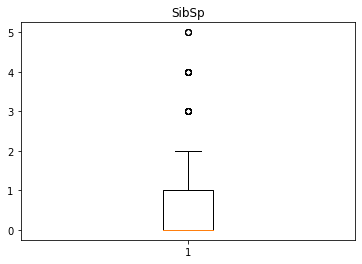

In [215]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')

In [216]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
low = Q1-1.5*IQR
up = Q3+1.5*IQR

In [217]:
Outlier3 = []
for x in data['SibSp']:
  if((x>up) or (x<low)):
    Outlier3.append(x)

In [218]:
Outlier3

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [219]:
ind =data['SibSp']>up
data.loc[ind].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [220]:
data.drop([25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace= True)

6. To Do min max scaling on the feature set

In [221]:
x = data.drop('Survived', axis=1)

In [222]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.723586,9.545220,0.501020,0.754625,13.092563
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.450000
max,3.000000,54.000000,2.000000,6.000000,61.379200


In [223]:
from sklearn import preprocessing

In [229]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))


In [236]:
x = min_max.fit_transform

In [ ]:
x =pd.DataFrame(x)

In [ ]:
y = data['SibSp']
x =data.drop('Survived', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42, test_size=0.2)
from sklearn import linear_model
lr = linear_model. LinearRegression() 
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions)) 
from sklearn.metrics import r2_score
print('R sqaured value is:', r2_score(y_test, predictions))